In [1]:
from  pathlib import Path
hymenoptera_data = Path("../../../data/hymenoptera_data")
data_dir = hymenoptera_data.as_posix()

In [2]:
import os

def display_directory_structure_limited(root_dir, max_files=3):
    for root, dirs, files in os.walk(root_dir):
        level = root.replace(root_dir, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for i, f in enumerate(files):
            if i < max_files:
                print(f"{sub_indent}{f}")
            else:
                print(f"{sub_indent}...")
                break


display_directory_structure_limited(data_dir)

hymenoptera_data/
    train/
        bees/
            2645107662_b73a8595cc.jpg
            2601176055_8464e6aa71.jpg:Zone.Identifier
            2610833167_79bf0bcae5.jpg
            ...
        ants/
            150801171_cd86f17ed8.jpg
            841049277_b28e58ad05.jpg:Zone.Identifier
            886401651_f878e888cd.jpg
            ...
    valid/
        bees/
            540976476_844950623f.jpg:Zone.Identifier
            2173503984_9c6aaaa7e2.jpg
            1181173278_23c36fac71.jpg:Zone.Identifier
            ...
        ants/
            205398178_c395c5e460.jpg
            2238242353_52c82441df.jpg
            212100470_b485e7b7b9.jpg:Zone.Identifier
            ...


In [3]:
# Insérer votre code ici
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
   transforms.Resize((224, 224)),  # Redimensionne les images
   transforms.ToTensor()])

hymenoptera_data_train = hymenoptera_data / "train"
hymenoptera_data_test = hymenoptera_data / "valid"

# Charger les données à partir du dossier
dataset_train = datasets.ImageFolder(root=hymenoptera_data_train.as_posix(), transform=transform)
dataset_test = datasets.ImageFolder(root=hymenoptera_data_test.as_posix(), transform=transform)

dataloader_train =  DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_test  =  DataLoader(dataset_test, batch_size=32, shuffle=True)

Shape X : torch.Size([32, 3, 224, 224])
Shape y : torch.Size([32])


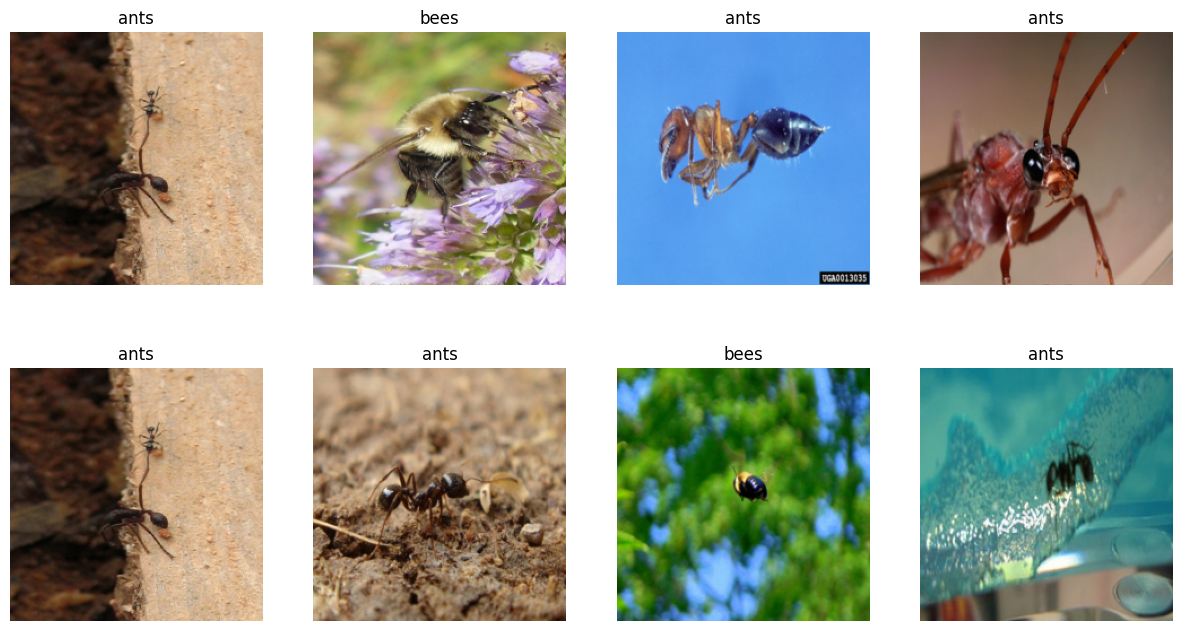

In [4]:
import matplotlib.pyplot as plt
import numpy as np
X_t, y_t = next(iter(dataloader_train))
print(f"Shape X : {X_t.shape}")
print(f"Shape y : {y_t.shape}")
plt.figure(figsize=(15,8))
j=1
for i in np.random.randint(0, len(X_t), size=[8]):
    plt.subplot(2,4,j)
    plt.axis('off')
    im = X_t[i].permute(1, 2, 0)
    im = (im - im.min())/(im.max()-im.min())
    plt.imshow(im)
    plt.title(dataset_train.classes[y_t[i].item()])
    j+=1

In [ ]:
import torchvision.models as models
from torchvision.models import ResNet50_Weights


# device
device = "cpu"

# preprocessing
weights = ResNet50_Weights.DEFAULT
# model

model = models.resnet50(weights=weights)

# freez layers
for param in model.parameters():
   param.requires_grad = False

# show summary
print (model)

print ("last layer",model.fc)
print ("last layer number of neurons in the output layer",1000)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
import torch.nn as nn

device = "cpu"

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2) 

model = model.to(device)


print ("last layer",model.fc)

print ("last layer number of neurons in the output layer",2)

print (model)



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
# Loss function
criterion = nn.CrossEntropyLoss()

X_batch, y_batch = next(iter(dataloader_train))

# Device
X_batch = X_batch.to(device)
y_batch = y_batch.to(device)

# Gradient mis 0
model.zero_grad()

# Calcul de prédiction
y_pred = model(X_batch)

# Calcul de la fonction de perte
loss = criterion(y_pred, y_batch)

print ("loss on sample X_batch", loss.item())


loss on sample X_batch 0.7353030443191528


In [8]:
import torch.optim as optim
import torch


def train_model(data_loader, criterion,optimizer, epochs) :

    for epoch in range(epochs):
        # Dans ce mode certaines couches du modèle agissent différemment
        model.train()
        loss_total = 0
        
        for batch in data_loader:
            # Batch de données
            X_batch, y_batch = batch

            # Device
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            # Gradient mis 0
            model.zero_grad()

            # Calcul de prédiction
            y_pred = model(X_batch.to(torch.float32))[:,0]

            # Calcul de la fonction de perte
            loss = criterion(y_pred*100, y_batch.to(torch.float32)*100)

            # Backpropagation : calculer le gradient de la loss en fonction de chaque couche
            loss.backward()

            # Clipper le gradient entre 0 et 1 pour plus de stabilité
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Descente de gradient : actualisation des paramètres
            optimizer.step()
            
            loss_total += loss.item()

        print(f"Epoch : {epoch+1}/{epochs} -- Training loss {loss_total/len(dataloader_train)}")


In [9]:
model.layer4.requires_grad = False
epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),1e-03)
train_model(dataloader_train,criterion,optimizer,epochs)

Epoch : 1/5 -- Training loss 41057.778076171875
Epoch : 2/5 -- Training loss 42067.280517578125
Epoch : 3/5 -- Training loss 35918.40234375
Epoch : 4/5 -- Training loss 32501.9443359375
Epoch : 5/5 -- Training loss 32387.63134765625


In [10]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import numpy as np 
def evaluate_model(dataloader_val):
    # Passer le modèle en évaluation
    model.eval()
    # Calculer la loss totale
    loss_val_total = 0
    # Stocker les prédictions et les vraies valeurs.
    predictions, true_vals = [], []
    for batch in dataloader_val:
        X_batch, y_batch = batch
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        with torch.no_grad():
            # Prédiction du modèle pour un batch donné
            y_pred = model(X_batch.to(torch.float32))
        # Calcul de la fonction de perte pour l'utiliser comme une métrique
        loss = criterion(y_pred, y_batch)
        # Cumuler la fonction de perte de tous les lots de données.
        loss_val_total += loss.item()
        # Enregistrer les prédictions pour les utiliser plus tard
        predictions.extend(y_pred.detach().cpu().numpy())
        # Enregistrer les vraies valeurs pour les utiliser plus tard
        true_vals.extend(y_batch.cpu().numpy())
    # Loss du jeu de données val
    loss_val_avg = loss_val_total / len(dataloader_val)
    # Ensemble des prédictions du jeu de données
    predictions = np.array(predictions)
    predictions = np.argmax(predictions, axis=-1)
    # Ensemble des vraies valeurs du jeu de données
    true_vals = np.array(true_vals)
    metrics = {"loss val avg":loss_val_avg,
            "MAE": mean_absolute_error(true_vals, predictions),
            "MSE": mean_squared_error(true_vals, predictions),
            "accuracy": accuracy_score(true_vals, predictions)}
    return  metrics , predictions, true_vals

metrics,predictions, true_vals = evaluate_model (dataloader_test)
print (metrics)

{'loss val avg': 0.7521045327186584, 'MAE': 0.6143790849673203, 'MSE': 0.6143790849673203, 'accuracy': 0.38562091503267976}


In [ ]:
model.layer4.train  
model.layer4.requires_grad_

In [ ]:
epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=1e-05)
train_model(dataloader_train,criterion,optimizer,epochs)

Epoch : 1/5 -- Training loss 34085.32507324219
Epoch : 2/5 -- Training loss 38376.17578125
Epoch : 3/5 -- Training loss 33679.08984375
Epoch : 4/5 -- Training loss 34027.20568847656
Epoch : 5/5 -- Training loss 25581.480224609375


In [14]:
metrics,predictions, true_vals = evaluate_model (dataloader_test)
print (metrics)

{'loss val avg': 0.774572741985321, 'MAE': 0.5686274509803921, 'MSE': 0.5686274509803921, 'accuracy': 0.43137254901960786}


In [ ]:

# load image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionner l'image à 224x224 pixels
    transforms.ToTensor(),  # Convertir l'image en tenseur
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normaliser les canaux de l'image
])


img_tensor = X_t[0]
def make_gradcam_heatmap(img_tensor, model, target_layer_name, pred_index=None):   
    # Passer en avant pour obtenir les prédictions et les activations de la couche cible
    def forward_hook(module, input, output):
        model.features = output

    # Enregistrer un hook sur la couche cible pour récupérer ses sorties
    hook = model._modules.get(target_layer_name).register_forward_hook(forward_hook)
    
    # Effectuer une passe avant pour obtenir les sorties du modèle
    output = model(img_tensor)
    
    # Supprimer le hook après avoir récupéré les activations
    hook.remove()

    # Si aucun indice de prédiction n'est fourni, utiliser celui avec la plus haute probabilité
    if pred_index is None:
        pred_index = output.argmax(dim=1).item()
    
    # Valeur de probabilité de la classe
    y = output[0, pred_index]
    
    # Passer en arrière pour obtenir les gradients de la couche cible
    model.zero_grad()  # Remettre à zéro les gradients
    model.features.retain_grad()  # Garder les gradients de la couche cible
    y.backward(retain_graph=True)  # Calculer les gradients par rétropropagation

    # Obtenir les gradients et les activations de la couche cible
    gradients = model.features.grad[0]
    activations = model.features[0]

    # Appliquer un pooling global moyen sur les gradients
    pooled_grads = torch.mean(gradients, dim=[1, 2])

    # Pondérer les activations par les gradients
    for i in range(len(pooled_grads)):
        activations[i, :, :] *= pooled_grads[i]

    # Calculer la heatmap
    heatmap = torch.mean(activations, dim=0).detach().numpy()
    heatmap = np.maximum(heatmap, 0)  # Ne conserver que les valeurs positives
    heatmap /= np.max(heatmap)  # Normaliser la heatmap

    return heatmap

# Identifier la couche cible (pour ResNet50, typiquement c'est 'layer4')
target_layer = 'layer4'

# Indices des classes pour le chien et le chat
dog_index = 0  # Chien Rhodesian
cat_index = 1  # Chat Égyptien

# Calculer les heatmaps pour le chien et le chat
heatmap_dog = make_gradcam_heatmap(img_tensor, model, target_layer, dog_index)
heatmap_cat = make_gradcam_heatmap(img_tensor, model, target_layer, cat_index)

im = img_tensor.permute(1, 2, 0)
im = (im - im.min())/(im.max()-im.min())
# Visualiser les résultats
plt.figure(figsize=(10, 7))

# Afficher l'image originale
plt.subplot(2, 2, 1)
plt.imshow(im)
plt.title("Image originale")

# Afficher la heatmap pour la région du chien
plt.subplot(2, 2, 2)
plt.imshow(heatmap_dog, cmap='jet')
plt.title("Importance de la région du chien")

# Afficher l'image originale à nouveau
plt.subplot(2, 2, 3)
plt.imshow(im)
plt.title("Image originale")

# Afficher la heatmap pour la région du chat
plt.subplot(2, 2, 4)
plt.imshow(heatmap_cat, cmap='jet')
plt.title("Importance de la région du chat")
plt.show()

ValueError: expected 4D input (got 3D input)

In [ ]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)
    
    def save_activation(self, module, input, output):
        self.activations = output.detach()
    
    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()
    
    def generate_cam(self, input_image, target_class=None):
        self.model.eval()
        output = self.model(input_image)
        
        if target_class is None:
            target_class = output.argmax(dim=1)
        
        self.model.zero_grad()
        one_hot = torch.zeros_like(output)
        one_hot[0][target_class] = 1
        output.backward(gradient=one_hot, retain_graph=True)
        
        # Pool gradients across spatial dimensions
        pooled_gradients = torch.mean(self.gradients, dim=[2, 3], keepdim=True)
        
        # Weight activations by gradients
        cam = torch.sum(pooled_gradients * self.activations, dim=1, keepdim=True)
        cam = torch.relu(cam)
        
        # Normalize
        cam = cam - cam.min()
        cam = cam / cam.max()
        
        return cam.squeeze().cpu().numpy()
    
# Data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

def visualize_gradcam(model, img_path, class_names):
    # Load and preprocess image
    img = Image.open(img_path).convert('RGB')
    preprocess = data_transforms['val']
    input_tensor = preprocess(img).unsqueeze(0).to(device)
    
    # Create Grad-CAM
    target_layer = model.layer4[-1]  # Last layer of ResNet50
    gradcam = GradCAM(model, target_layer)
    
    # Generate CAM
    cam = gradcam.generate_cam(input_tensor)
    
    # Get prediction
    with torch.no_grad():
        output = model(input_tensor)
        probs = torch.nn.functional.softmax(output, dim=1)
        pred_class = output.argmax(dim=1).item()
        confidence = probs[0][pred_class].item()
    
    # Resize CAM to image size
    img_np = np.array(img.resize((224, 224)))
    cam_resized = cv2.resize(cam, (224, 224))
    
    # Create heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    
    # Superimpose heatmap on image
    superimposed = heatmap * 0.4 + img_np * 0.6
    superimposed = np.uint8(superimposed)
    
    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(img_np)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(cam_resized, cmap='jet')
    axes[1].set_title('Grad-CAM Heatmap')
    axes[1].axis('off')
    
    axes[2].imshow(superimposed)
    axes[2].set_title(f'Prediction: {class_names[pred_class]}\nConfidence: {confidence:.2%}')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.savefig('gradcam_result.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return pred_class, confidence

ModuleNotFoundError: No module named 'cv2'

In [ ]:
print("\nGenerating Grad-CAM visualization...")
# Get a sample image from validation set
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                      for x in ['train', 'val']}
class_names = image_datasets['train'].classes
print(f"Classes: {class_names}")
sample_img_path = os.path.join(data_dir, 'val', class_names[0], os.listdir(os.path.join(data_dir, 'valid', class_names[0]))[0])
pred_class, confidence = visualize_gradcam(model, sample_img_path, class_names)

print(f"\nGrad-CAM visualization saved to 'gradcam_result.png'")
print(f"Predicted: {class_names[pred_class]} with {confidence:.2%} confidence")